C:\Users\FABIO HENRIQUE\AppData\Local\Temp\ipykernel_2228\2747374839.py:47: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


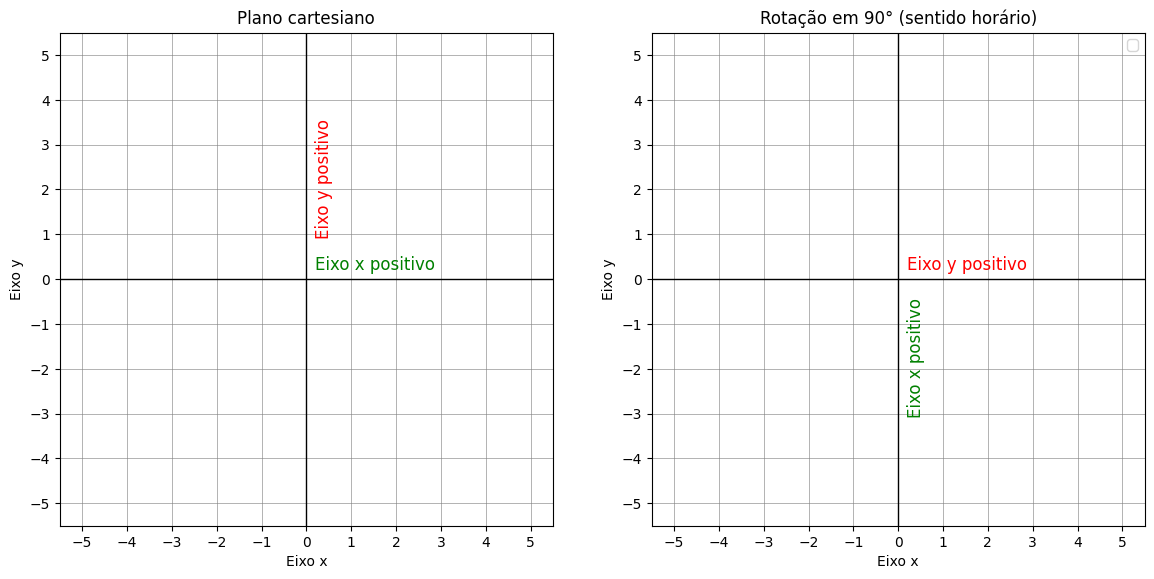

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# definindo os extremos e a origem
eixos = np.array([-6, 12])
origem = np.array([0, 0])

fig, axes = plt.subplots(ncols=2, figsize=(14, 14))
ax1 = axes[0]
ax2 = axes[1]

# função para criar um plano cartesiano
def config_ax(ax):
  # Define as marcas principais para as unidades (retângulos)
  unidades = np.arange(-5, 6, 1)
  ax.set_xticks(unidades)
  ax.set_yticks(unidades)

  # Desenha a grade para representar os retângulos
  ax.grid(which='major', color='gray', linestyle='-', linewidth=0.7, alpha=0.6)

  # Garante que as unidades sejam visualmente quadradas (Crucial!)
  ax.set_aspect('equal', adjustable='box') 

  # Define os limites para o plano
  ax.set_xlim(unidades.min() - 0.5, unidades.max() + 0.5)
  ax.set_ylim(unidades.min() - 0.5, unidades.max() + 0.5)

  # Criando linhas cortando a origem entre os extremos
  ax.plot(eixos, origem, color='black', linestyle='-', linewidth=1)
  ax.plot(origem, eixos, color='black', linestyle='-', linewidth=1)
  ax.set_xlabel('Eixo x')
  ax.set_ylabel('Eixo y')

config_ax(ax1)
config_ax(ax2)

ax1.set_title('Plano cartesiano')
ax1.text(0.2, 0.2, 'Eixo x positivo', fontsize=12, color='green')
ax1.text(0.2, 1, 'Eixo y positivo', fontsize=12, color='red', rotation=90)

# Rotação de 90° demonstração
ax2.set_title('Rotação em 90° (sentido horário)')
ax2.text(0.2, -3.0, 'Eixo x positivo', fontsize=12, color='green', rotation=90)
ax2.text(0.2, 0.2, 'Eixo y positivo', fontsize=12, color='red')

plt.legend()
plt.show()


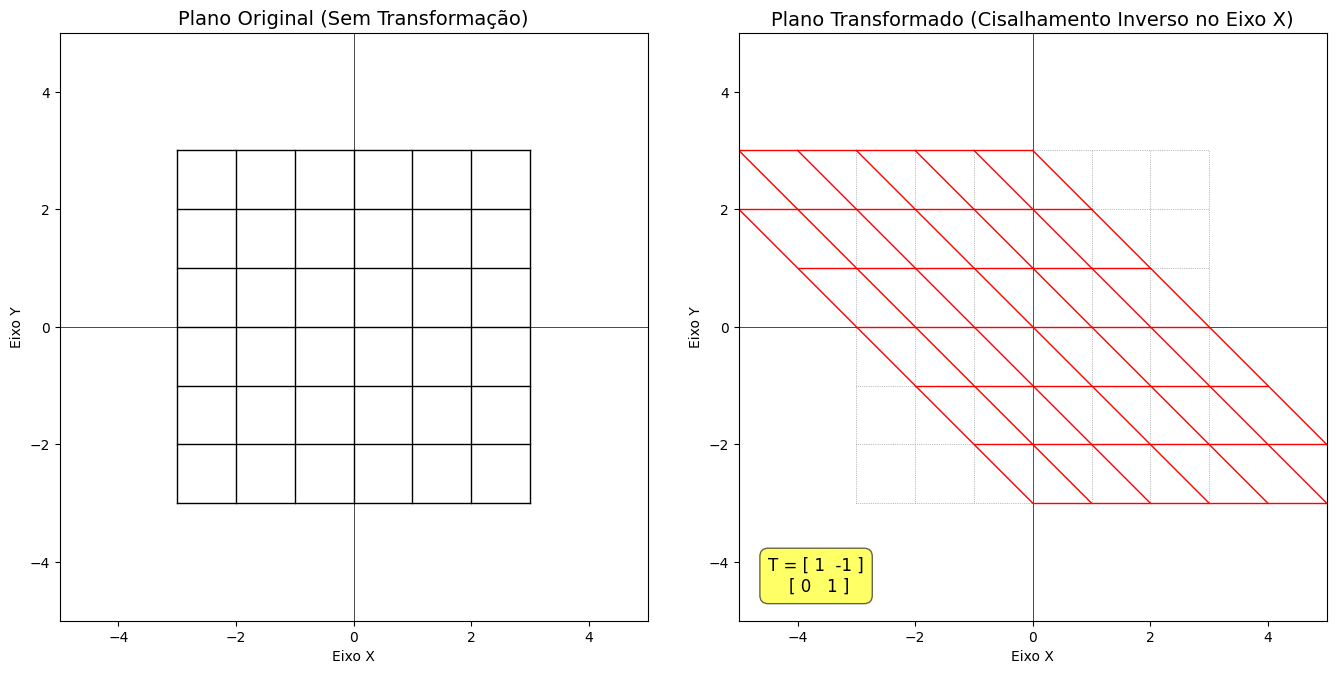

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Definições de Transformação e Matriz de Cisalhamento ---

# Cisalhamento no eixo X (T = [[1, s], [0, 1]]) com s negativo
fator_cisalhamento = -1.0 
matriz_cisalhamento = np.array([[1, fator_cisalhamento], 
                                [0, 1]])

# 2. Criação da Grade de Pontos
limites = np.linspace(-3, 3, 7) 
num_pontos = 50 
eixos_base = np.linspace(limites.min(), limites.max(), num_pontos)

# --- 3. Configuração da Figura com Dois Eixos ---
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7)) 
ax_original = axes[0]    
ax_transformado = axes[1] 

# Configurações comuns de Eixos
for ax in axes:
    ax.set_aspect('equal', adjustable='box') 
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xlabel('Eixo X')
    ax.set_ylabel('Eixo Y')
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.grid(False)


# --------------------------------------------------------
# 4. Plotagem no PLANO ORIGINAL (ax_original)
# --------------------------------------------------------

for val in limites:
    ax_original.plot([val, val], [limites.min(), limites.max()], 
                     color='black', linestyle='-', linewidth=1)
    ax_original.plot([limites.min(), limites.max()], [val, val], 
                     color='black', linestyle='-', linewidth=1)
ax_original.set_title('Plano Original (Sem Transformação)', fontsize=14)


# --------------------------------------------------------
# 5. Plotagem no PLANO TRANSFORMADO (ax_transformado)
# --------------------------------------------------------

# Grade Original (Referência Cinza)
for val in limites:
    ax_transformado.plot([val, val], [limites.min(), limites.max()], 
                         color='gray', linestyle=':', linewidth=0.5)
    ax_transformado.plot([limites.min(), limites.max()], [val, val], 
                         color='gray', linestyle=':', linewidth=0.5)

# Aplicação da Transformação à Grade (Linhas Vermelhas Transformadas)
for x in limites:
    linha_original = np.array([np.full(num_pontos, x), eixos_base])
    linha_transformada = matriz_cisalhamento @ linha_original
    ax_transformado.plot(linha_transformada[0, :], linha_transformada[1, :], 
            color='red', linestyle='-', linewidth=1)

for y in limites:
    linha_original = np.array([eixos_base, np.full(num_pontos, y)])
    linha_transformada = matriz_cisalhamento @ linha_original
    ax_transformado.plot(linha_transformada[0, :], linha_transformada[1, :], 
            color='red', linestyle='-', linewidth=1)

ax_transformado.set_title(f'Cisalhamento Antihorário no Eixo X', fontsize=14)

# **** LINHA CORRIGIDA PARA SINTAXE MAIS SIMPLES ****
ax_transformado.text(-4.5, -4.5, 
                     'T = [ 1  -1 ]\n    [ 0   1 ]', 
                     fontsize=12, 
                     bbox=dict(facecolor='yellow', alpha=0.6, boxstyle='round,pad=0.5'))
# ****************************************************

# --- 6. Exibição ---
# Se o erro persistir, comente a linha abaixo!
plt.tight_layout(pad=3.0) 
plt.show()